# Overview

Today we are going to find the power of ensemble methods. These ensemble methods are quite useful when we have weak classifiers. The main purpose of these ensemble methods is to create a more robust and accurate final model(strong correlated model) and therefore achieve better results. The way ensemble methods achieve this result is by combining many weak classifiers together. In this way, if we do bagging, we can reduce variance and if we do boosting, we can reduce bias. There are also many other ways to do ensemble methods. Lets go and explore the facinating effect of them.

In [4]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data
    This data set used in the sklean dataset containing information on wine fron UCI. The data consists of 13 variables and one numerical target indicating the quality of the product.https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine 

In [61]:
X, y = load_wine(return_X_y=True)
data = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
target = pd.Series(load_wine().target)

# Exploratory Data Analysis 
    Since we are trying to understand the hidden relationships and correlations under the dataset, it is quite helpful for us to take a EDA on the dataset and have a good look of what might be going on.

The first thing to look at is the dimensions of the dataset

In [62]:
X.shape, y.shape

((178, 13), (178,))

This dataset has 178 records of wines. Each record has 13 elements. And target is just a single value for each record

Check whether there is null values in the dataset

In [63]:
data.isnull().values.any()
target.isnull().values.any()

False

This dataset turns out to be quite clean without any missing value. I guess it is preprocessed by professional people and then uploaded. 

In [64]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Build a histogram of target

<BarContainer object of 3 artists>

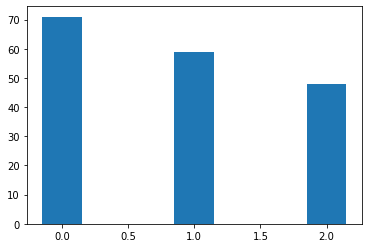

In [66]:
x = target.unique()
height = target.value_counts()
plt.bar(x = x, height = height, width = .3)

From the bar plot above, we can see that the distribution of target values are quite even. All three categories are almost the same in number. Therefore, we can spare the error from skewed distribution of target values.


# Models

The next step is to understand the dataset is to build some models and put the data in so that we can have a look about how can a computer interpret the data. For this assignment, I will use Random Forest,  kNN,  SVC, Logistic Regression to find the relations in the data.

In [75]:
import warnings
warnings.filterwarnings("ignore")

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier

RANDOM_SEED = 42
rf_clf = RandomForestClassifier(n_estimators=10, random_state=RANDOM_SEED) # random forest
knn_clf = KNeighborsClassifier(n_neighbors=2)
svc_clf = SVC(C=10000.0, kernel='rbf', random_state=RANDOM_SEED)
lr_clf = LogisticRegression(C=20000, penalty='l2', random_state=RANDOM_SEED)

clfs = [rf_clf, knn_clf, svc_clf, lr_clf]
labels = [clf.__class__.__name__ for clf in clfs]

Today, instead of predicting the results with these basic models, we are also going to use some other ensemble methods to try to improve the accuracy of these models. There are 4 different ensemble methods we are going to use. <br>1 : bagging<br> 2 : boostring<br> 3 : stacked model <br> 4 : stacked model  w/ Grid Search Cross Validation hyperparameters

Firstly, let's see what the results of base models are. 

In [88]:
base_accuracies = []
for clf, label in zip(clfs, labels):
    cv_scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))
    base_accuracies.append(cv_scores.mean())
    

Accuracy: 0.9054 (+/- 0.0564) [RandomForestClassifier]
Accuracy: 0.6469 (+/- 0.0643) [KNeighborsClassifier]
Accuracy: 0.4494 (+/- 0.0008) [SVC]
Accuracy: 0.9216 (+/- 0.0200) [LogisticRegression]


Next, lets put these models into bagging ensemble methods.

In [91]:
bagging_accuracies = []
ratio = .4
for clf, label in zip(clfs, labels):
    bagging_clf = BaggingClassifier(clf, max_samples=ratio, max_features=3, random_state=RANDOM_SEED)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)
    bagging_accuracies.append(bagging_scores.mean())
    print("Accuracy: %0.4f (+/- %0.4f) [Bagging %s]" % (bagging_scores.mean(), bagging_scores.std(), clf.__class__.__name__))

Accuracy: 0.9331 (+/- 0.0406) [Bagging RandomForestClassifier]
Accuracy: 0.8828 (+/- 0.0715) [Bagging KNeighborsClassifier]
Accuracy: 0.7534 (+/- 0.0972) [Bagging SVC]
Accuracy: 0.9109 (+/- 0.0547) [Bagging LogisticRegression]


Next, lets put these models into boostring ensemble methods

In [100]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier

boost_accuracies = []
ada_boost = AdaBoostClassifier(n_estimators=5)
grad_boost = GradientBoostingClassifier(n_estimators=10)
xgb_boost = XGBClassifier(max_depth=5, learning_rate=0.001)
ensemble_clf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
boosting_labels = ['Ada Boost', 'Gradient Boost', 'XG Boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    boost_accuracies.append(scores.mean())
    print("Accuracy: {0:.3f}, Variance: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Accuracy: 0.843, Variance: (+/-) 0.033 [Ada Boost]
Accuracy: 0.848, Variance: (+/-) 0.062 [Gradient Boost]
Accuracy: 0.872, Variance: (+/-) 0.068 [XG Boost]
Accuracy: 0.882, Variance: (+/-) 0.062 [Ensemble]


Next, lets put these models into stack method

In [138]:
stack_accuraies = []
sclf = StackingClassifier(classifiers=clfs, meta_classifier=lr_clf)

for clf, label in zip(clfs, labels):
    cv_scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))
    stack_accuraies.append(cv_scores.mean())

Accuracy: 0.9054 (+/- 0.0564) [RandomForestClassifier]
Accuracy: 0.6469 (+/- 0.0643) [KNeighborsClassifier]
Accuracy: 0.4494 (+/- 0.0008) [SVC]
Accuracy: 0.9216 (+/- 0.0200) [LogisticRegression]


In [139]:
stack_accuraies

[0.9053639846743295,
 0.6469348659003832,
 0.44942528735632187,
 0.921647509578544]

Next, lets put these models into stacked model  w/ Grid Search Cross Validation hyperparameters

In [136]:
params = {'randomforestclassifier__n_estimators': np.arange(10,20), 
          'randomforestclassifier__max_depth': np.arange(1,5), 
          'kneighborsclassifier__n_neighbors': np.arange(1,20,2),
          'svc__C': [0.001,0.01,0.1,1,10,100]}

gsearch_cv = GridSearchCV(estimator=sclf, param_grid=params, cv=5, refit=True)
gsearch_cv.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')
print('Best parameters: %s' % gsearch_cv.best_params_)
print('Accuracy: %.2f' % gsearch_cv.best_score_)

Best parameters: {'kneighborsclassifier__n_neighbors': 3, 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 18, 'svc__C': 1}
Accuracy: 0.97


Lets make a graph to compare the results of these different methods. 

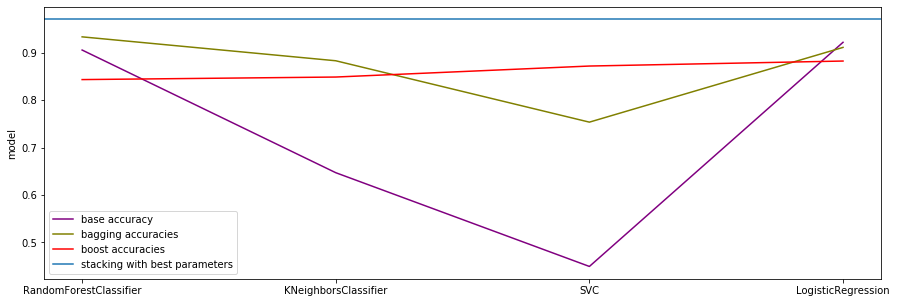

In [172]:
plt.figure(figsize=(15, 5))
plt.plot(labels, base_accuracies, color="purple")
plt.plot(labels, bagging_accuracies, color='olive')
plt.plot(labels, boost_accuracies, marker='', color='red')
plt.axhline(0.97)
plt.ylabel("accuracy")
plt.ylabel("model")
plt.legend(["base accuracy", "bagging accuracies","boost accuracies", "stacking with best parameters"])

plt.show()

As we can see above, the stacked model w/ Grid Search Cross Validation hyperparameters is giving us the best result. Also, by incorporating ensemble methods to the classifiers, the result is becoming both more consistant more accurate. 

# Conclusions

In many cases, when we are trying to make a model to predict the values from data, the model is not accurate enough since one single model is weak. However, if we manipulate these models and use ensemble methods like bagging(reducing Variance), boosting(reducing biad) and etc, we can reach a result that is much more robust and accurate. 

In this example, the stacked model w/ Grid Search Cross Validation hyperparameters is giving us the best result. I guess this achieve by finding the parameters that return the best result. However, when I run the method, I took a lot of time since It have to train a bunch of different classifiers to compare the accuracy result. 

Therefore, my recommendation is that we do grid search only if we are dealing with a small dataset or we need to be perfect on the test results(like fraud testing or cancer testing). Otherwise, other ensemble methods would probably yield acceptable result in a short time. 